In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/patches/lp_pisite_residue_with_aa.csv')
df['percentage_interaction'] = df['ppi_in_patch']/df['patch_size']
df['random'] = df['random_patch_size']/df['patch_size']

In [4]:
len(df)

60013

In [13]:
len(df[df['rank'] == 1])

4460

In [14]:
min(df[df['rank'] == 1]['size']), max(df[df['rank'] == 1]['size'])

(89.0, 17159.0)

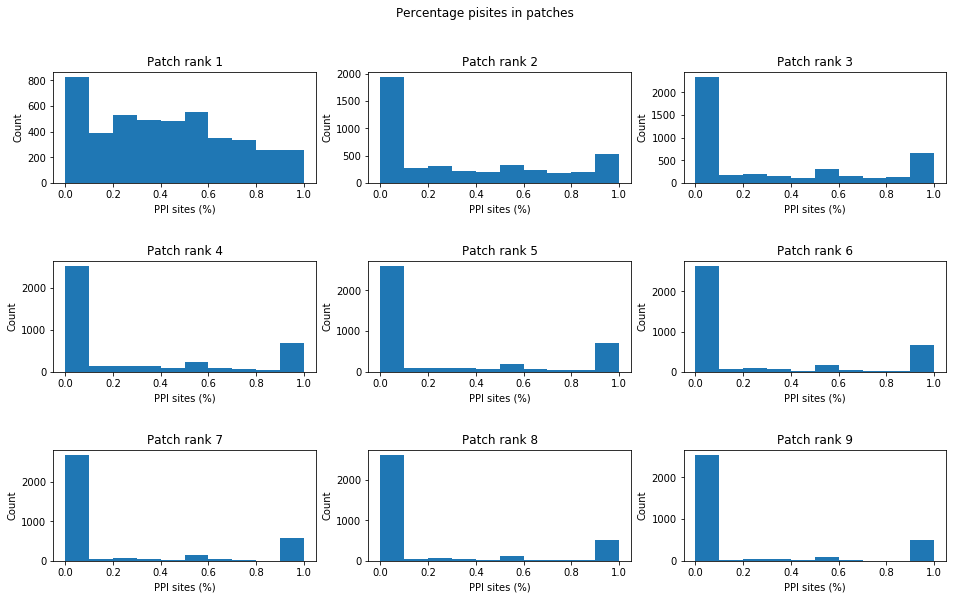

In [15]:
x, y = 3, 3
fig, axs = plt.subplots(x, y, figsize=(16, 9))
fig.suptitle('Percentage pisites in patches')

for i in range(x):
    for j in range(y):
        axs[i, j].hist(df[df['rank'] == i*3+j+1]['percentage_interaction'])
        axs[i, j].set_title('Patch rank '+str(i*3+j+1))
        
for ax in axs.flat:
    ax.set(xlabel='PPI sites (%)', ylabel='Count')
    
plt.subplots_adjust(hspace=.7)

In [16]:
df[df['rank'] == 1]['patch_size'].mean()

26.463677130044843

In [17]:
df[df['rank'] == 1]['size'].mean()

1325.1506726457399

In [18]:
df[df['rank'] == 1]['on_surface'].mean()

180.8334080717489

In [19]:
df.groupby('rank')['patch_size'].mean()

rank
1.0     26.463677
2.0     10.768567
3.0      6.657956
4.0      4.969646
5.0      3.923154
6.0      3.329236
7.0      2.872951
8.0      2.607514
9.0      2.276602
10.0     2.193245
11.0     2.044797
12.0     1.978349
13.0     1.883143
14.0     1.822175
15.0     1.756053
16.0     1.755335
17.0     1.656000
18.0     1.644380
19.0     1.641405
20.0     1.576408
Name: patch_size, dtype: float64

In [20]:
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

for x in range(1,21):
    print('rank '+str(x),wilcoxon(df[df['rank'] == x]['percentage_interaction'],df[df['rank'] == x]['random']))

rank 1 WilcoxonResult(statistic=1484841.5, pvalue=2.5314640162597593e-266)
rank 2 WilcoxonResult(statistic=2413719.5, pvalue=5.6607942958629725e-24)
rank 3 WilcoxonResult(statistic=1963004.0, pvalue=3.414339858740239e-06)
rank 4 WilcoxonResult(statistic=1606768.0, pvalue=0.7228537358260343)
rank 5 WilcoxonResult(statistic=1241480.5, pvalue=0.6584869215353509)
rank 6 WilcoxonResult(statistic=889017.5, pvalue=0.13762363642922648)
rank 7 WilcoxonResult(statistic=658956.5, pvalue=0.0321120346710011)
rank 8 WilcoxonResult(statistic=536599.5, pvalue=2.1778867298445664e-06)
rank 9 WilcoxonResult(statistic=412990.5, pvalue=0.04538609689152154)
rank 10 WilcoxonResult(statistic=314712.5, pvalue=0.0029281525197761547)
rank 11 WilcoxonResult(statistic=251372.0, pvalue=0.0023288652154904686)
rank 12 WilcoxonResult(statistic=197527.5, pvalue=1.1156513798547114e-07)
rank 13 WilcoxonResult(statistic=156233.5, pvalue=1.1507814122007854e-07)
rank 14 WilcoxonResult(statistic=117774.5, pvalue=9.2661839462

In [21]:
for x in range(1,21):
    avg_correct = df[df['rank'] == x]['percentage_interaction'].mean()
    avg_random_correct = df[df['rank'] == x]['random'].mean()
    print('rank '+str(x), avg_correct, avg_random_correct)

rank 1 0.41009936868860314 0.27557369935645387
rank 2 0.32717224773893566 0.2662756853181081
rank 3 0.2952855836408867 0.25755354564031235
rank 4 0.2645964223579848 0.2540200435437006
rank 5 0.2530579360296704 0.24241069170694465
rank 6 0.22934837850809747 0.23628562917137358
rank 7 0.20230515132033952 0.22008788133185497
rank 8 0.1902496973161713 0.22910347319668134
rank 9 0.18144505244321243 0.202411271427452
rank 10 0.1707014738356082 0.20116393386123813
rank 11 0.15731464626192398 0.18874051899551536
rank 12 0.1445015290519877 0.19720621682089556
rank 13 0.13835064023575666 0.19500204800244256
rank 14 0.13193826784445123 0.18401419002698305
rank 15 0.11486347265241739 0.18903610475104302
rank 16 0.12065796210957502 0.17752374865278084
rank 17 0.110535873015873 0.17749608465608452
rank 18 0.10000960614793467 0.1704594940762087
rank 19 0.09902101732046277 0.156717425109292
rank 20 0.09195710455764076 0.16216647516915625


In [19]:
len(df[df['rank'] == 2])

4201

In [134]:
df['random'].mean()

0.22501765097524593

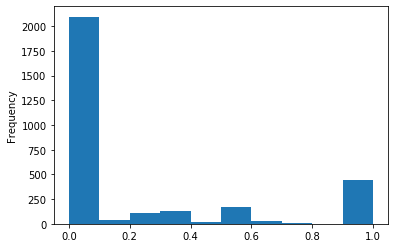

In [114]:
df[df['rank'] == 10]['random'].plot.hist()

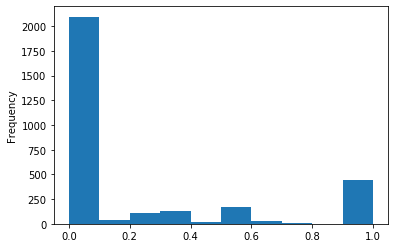

In [117]:
df[df['rank'] == 10]['random'].plot.hist()

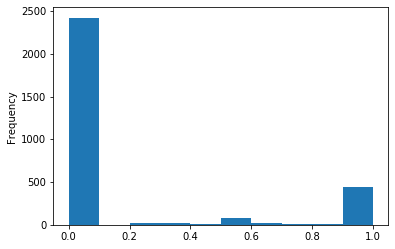

In [118]:
df[df['rank'] == 10]['percentage_interaction'].plot.hist()